# WEEK2 HW
## Minju Jo

In [1]:
import numpy as np; np.set_printoptions(precision=3)
import pandas as pd; pd.set_option('display.precision',3)
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA

In [2]:
real = pd.read_csv('real.csv', index_col=0)
real.columns = ['date','house_age','dist_mrt','no_cvs','lat','long','price']
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
No,,,,,,,
1,2012.917,32.0,84.879,10,24.983,121.540,37.9
2,2012.917,19.5,306.595,9,24.980,121.540,42.2
3,2013.583,13.3,561.985,5,24.987,121.544,47.3
4,2013.500,13.3,561.985,5,24.987,121.544,54.8
5,2012.833,5.0,390.568,5,24.979,121.542,43.1
...,...,...,...,...,...,...,...
410,2013.000,13.7,4082.015,0,24.942,121.504,15.4
411,2012.667,5.6,90.456,9,24.974,121.543,50.0
412,2013.250,18.8,390.970,7,24.979,121.540,40.6


In [3]:
real.info() # No NA value

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       414 non-null    float64
 1   house_age  414 non-null    float64
 2   dist_mrt   414 non-null    float64
 3   no_cvs     414 non-null    int64  
 4   lat        414 non-null    float64
 5   long       414 non-null    float64
 6   price      414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 25.9 KB


거래가 기준 정렬

In [4]:
real.sort_values(by=['price'], inplace=True)
real.reset_index(inplace=True) # inplace: replace the original dataset
real = real.drop(['No'], axis=1)
real

,date,house_age,dist_mrt,no_cvs,lat,long,price
0,2013.333,14.8,393.261,6,24.962,121.538,7.6
1,2013.583,17.4,6488.021,1,24.957,121.474,11.2
2,2012.750,16.0,4066.587,0,24.943,121.503,11.6
3,2013.000,30.9,6396.283,1,24.944,121.479,12.2
4,2013.083,32.0,1156.777,0,24.949,121.530,12.8
...,...,...,...,...,...,...,...
409,2012.833,0.0,292.998,6,24.977,121.545,71.0
410,2013.417,0.0,292.998,6,24.977,121.545,73.6
411,2013.583,35.4,318.529,9,24.971,121.541,78.0
412,2013.333,37.2,186.510,9,24.977,121.543,78.3


In [5]:
real.describe()

,date,house_age,dist_mrt,no_cvs,lat,long,price
count,414.000,414.000,414.000,414.000,414.000,414.000,414.000
mean,2013.149,17.713,1083.886,4.094,24.969,121.533,37.980
std,0.282,11.392,1262.110,2.946,0.012,0.015,13.606
min,2012.667,0.000,23.383,0.000,24.932,121.474,7.600
25%,2012.917,9.025,289.325,1.000,24.963,121.528,27.700
50%,2013.167,16.100,492.231,4.000,24.971,121.539,38.450
75%,2013.417,28.150,1454.279,6.000,24.977,121.543,46.600
max,2013.583,43.800,6488.021,10.000,25.015,121.566,117.500


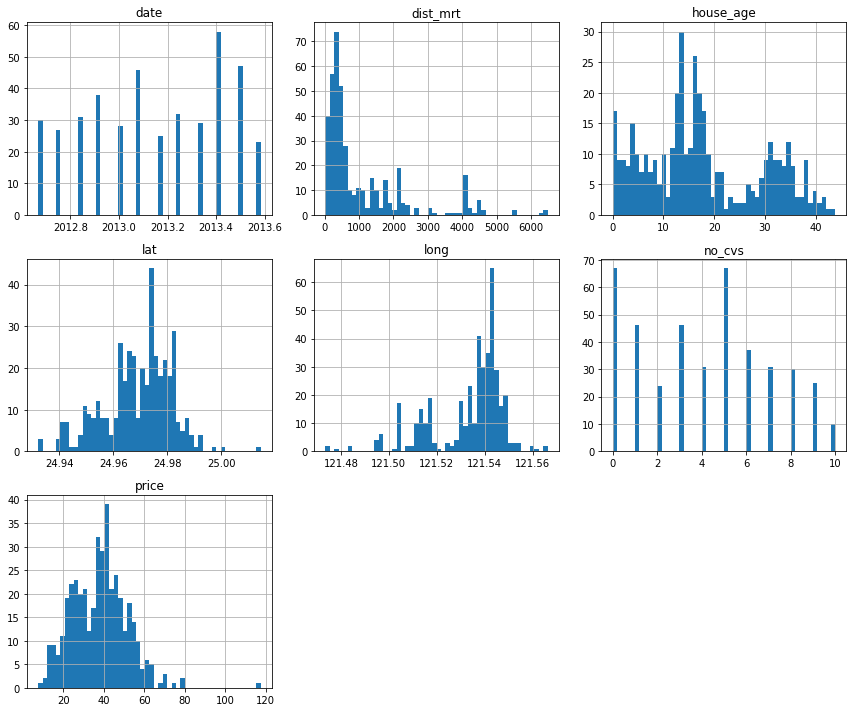

In [6]:
real.hist(bins=50, figsize=(12,10))
plt.tight_layout()

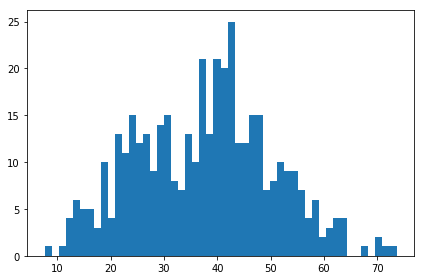

In [7]:
real = real[real.price < np.percentile(real.price, 99.5)]
plt.hist(real.price, bins=50)
plt.tight_layout()

넘사벽 거래가는 지워버린다(~99.5%)

변수 간 관계 살펴봅시당

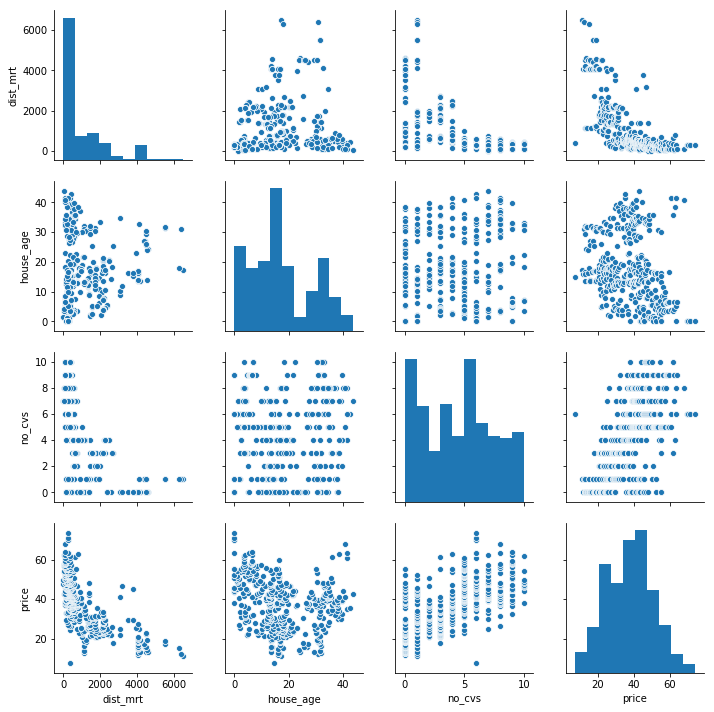

In [8]:
sns.pairplot(real[['dist_mrt', 'house_age','no_cvs','price']])

지하철 역과의 거리의 분포가 너무 skewed됐다. ->변환해주자

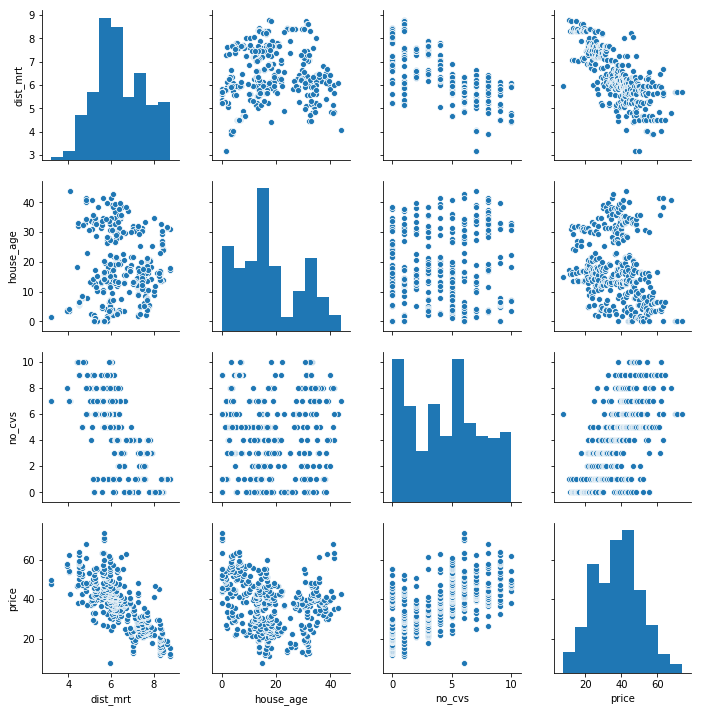

In [9]:
real2 = real.copy()
real2['dist_mrt'] = np.log(1+real.dist_mrt) # to prevent inf
sns.pairplot(real2[['dist_mrt', 'house_age','no_cvs','price']])

## Test set 추출

In [10]:
X = real2[['dist_mrt', 'house_age']]
Y = real2['price']

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=415)
X_train_normalized = StandardScaler().fit_transform(X_train)
X_test_normalized = StandardScaler().fit_transform(X_test)

## Polynomial Basis로 Feature Extraction

In [12]:
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

In [13]:
def rmse(model, X, y):
    return np.sqrt(np.mean((y - model.predict(X)) ** 2))

In [14]:
linear_model = lm.LinearRegression(fit_intercept=False)

In [15]:
tr_errors = []
te_errors = []

for N in range(2, 13):
    poly = PolynomialFeatures(degree=N)
    X_train_poly = poly.fit_transform(X_train_normalized)
    X_test_poly = poly.fit_transform(X_test_normalized)
    
    linear_model.fit(X_train_poly, Y_train)
    
    train_error = rmse(linear_model, X_train_poly, Y_train)
    tr_errors.append(train_error)
    
    test_error = rmse(linear_model, X_test_poly, Y_test)
    te_errors.append(test_error)

Text(0, 0.5, 'log(RMSE)')

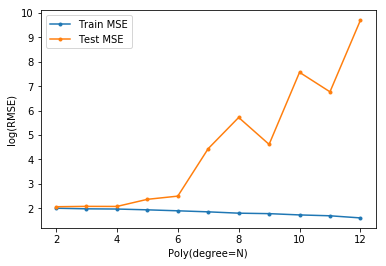

In [16]:
plt.plot(range(2, 13), np.log(tr_errors), marker='.')
plt.plot(range(2, 13), np.log(te_errors), marker='.')
plt.legend(["Train MSE", "Test MSE"])
plt.xlabel("Poly(degree=N)")
plt.ylabel("log(RMSE)")

차수를 높이는게 별로 메리트가 없어보이므로 degree=2로 선택

In [17]:
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)
X_train_normalized = StandardScaler().fit_transform(X_train_poly)
X_test_normalized = StandardScaler().fit_transform(X_test_poly)

## Ridge/Lasso Regression 해보기

### Ridge

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

In [19]:
tr_errors = []
te_errors = []
coefs = []

model_r = Ridge()
alpha_arr = np.logspace(-6, 6, 100)

for alpha in alpha_arr:
    model_r.set_params(alpha=alpha)
    
    model_r.fit(X_train_normalized, Y_train)
    coefs.append(model_r.coef_)
    
    train_error = rmse(model_r, X_train_normalized, Y_train)
    tr_errors.append(train_error)
    
    test_error = rmse(model_r, X_test_normalized, Y_test)
    te_errors.append(test_error)

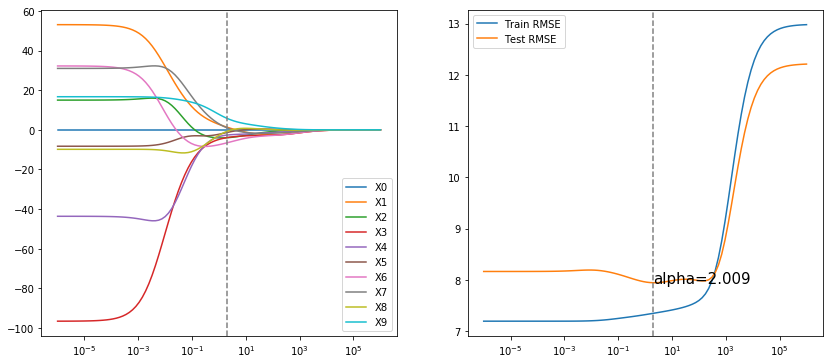

In [20]:
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(121)
labels = ['X%d'%i for i in range(X_train_normalized.shape[1])]
for i in range(X_train_normalized.shape[1]):
    ax1.plot(alpha_arr, np.array(coefs)[:,i], label=labels[i])
ax1.set_xscale('log')
ax1.axvline(x=alpha_arr[np.argmin(te_errors)], linestyle='--', color='grey')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(alpha_arr, tr_errors, label='Train RMSE')
ax2.plot(alpha_arr, te_errors, label='Test RMSE')
ax2.set_xscale('log')
ax2.axvline(x=alpha_arr[np.argmin(te_errors)], linestyle='--', color='grey')
alpha = np.around(alpha_arr[np.argmin(te_errors)],3)
ax2.text(alpha_arr[np.argmin(te_errors)], np.amin(te_errors), 'alpha={0}'.format(alpha), size=15)
ax2.legend()

In [21]:
print("Weight :" ,coefs[np.argmin(te_errors)])
print("Best alpha : ",alpha_arr[np.argmin(te_errors)])

Weight : [ 0.     1.306 -3.981 -3.923 -2.644 -1.333 -6.54   0.963 -0.733  5.755]
Best alpha :  2.009233002565046


### Lasso

In [22]:
from sklearn.linear_model import Lasso

In [23]:
tr_errors = []
te_errors = []
coefs = []

model_l = Lasso(max_iter=1000000)

for alpha in alpha_arr:
    model_l.set_params(alpha=alpha)
    
    model_l.fit(X_train_normalized, Y_train)
    coefs.append(model_l.coef_)
    
    train_error = rmse(model_l, X_train_normalized, Y_train)
    tr_errors.append(train_error)
    
    test_error = rmse(model_l, X_test_normalized, Y_test)
    te_errors.append(test_error)

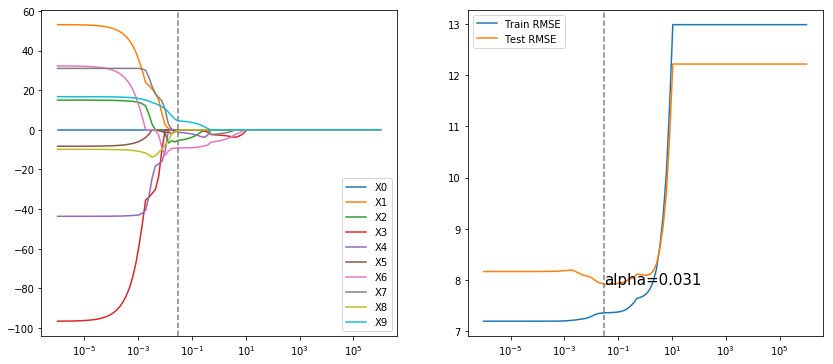

In [24]:
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(121)
labels = ['X%d'%i for i in range(X_train_normalized.shape[1])]
for i in range(X_train_normalized.shape[1]):
    ax1.plot(alpha_arr, np.array(coefs)[:,i], label=labels[i])
ax1.set_xscale('log')
ax1.axvline(x=alpha_arr[np.argmin(te_errors)], linestyle='--', color='grey')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(alpha_arr, tr_errors, label='Train RMSE')
ax2.plot(alpha_arr, te_errors, label='Test RMSE')
ax2.set_xscale('log')
ax2.axvline(x=alpha_arr[np.argmin(te_errors)], linestyle='--', color='grey')
alpha = np.around(alpha_arr[np.argmin(te_errors)],3)
ax2.text(alpha_arr[np.argmin(te_errors)], np.amin(te_errors), 'alpha={0}'.format(alpha), size=15)
ax2.legend()

In [25]:
print("Weight :" ,coefs[np.argmin(te_errors)])
print("Best alpha : ",alpha_arr[np.argmin(te_errors)])

Weight : [ 0.    -0.    -5.324 -0.    -1.293 -0.    -9.139 -0.    -0.     4.508]
Best alpha :  0.030538555088334186


### K-cv sampling & MSE 최소화하는 lambda 찾기

In [26]:
from sklearn.model_selection import cross_val_score

cv_errors_ridge=[]
cv_errors_lasso=[]

for alpha in alpha_arr:
    model_r.set_params(alpha=alpha)
    cv_error_R = np.mean(cross_val_score(model_r, X_train_normalized, Y_train, scoring=rmse, cv=5))
    cv_errors_ridge.append(cv_error_R)
    
    model_l.set_params(alpha=alpha)
    cv_error_L = np.mean(cross_val_score(model_l, X_train_normalized, Y_train, scoring=rmse, cv=5))
    cv_errors_lasso.append(cv_error_L)        
    
best_alpha_ridge = alpha_arr[np.argmin(cv_errors_ridge)]
best_alpha_lasso = alpha_arr[np.argmin(cv_errors_lasso)]

In [27]:
print("Best alpha(Ridge) : ",best_alpha_ridge)
print("Best alpha(Lasso) : ",best_alpha_lasso)

Best alpha(Ridge) :  0.013219411484660288
Best alpha(Lasso) :  0.001873817422860385


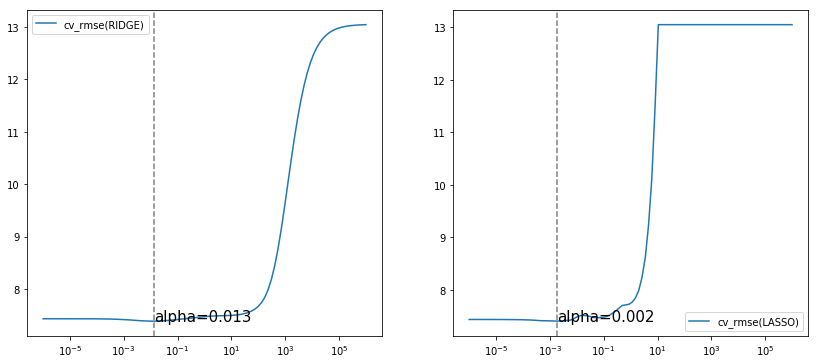

In [28]:
fig = plt.figure(figsize=(14,6))

ax1 = fig.add_subplot(121)
ax1.plot(alpha_arr, cv_errors_ridge, label='cv_rmse(RIDGE)')
ax1.set_xscale('log')
ax1.axvline(x=best_alpha_ridge, linestyle='--', color='grey')
alpha = np.around(best_alpha_ridge,3)
ax1.text(best_alpha_ridge, np.amin(cv_errors_ridge), 'alpha={0}'.format(alpha), size=15)
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(alpha_arr, cv_errors_lasso, label='cv_rmse(LASSO)')
ax2.set_xscale('log')
ax2.axvline(x=best_alpha_lasso, linestyle='--', color='grey')
alpha = np.around(best_alpha_lasso,3)
ax2.text(best_alpha_lasso, np.amin(cv_errors_lasso), 'alpha={0}'.format(alpha), size=15)
ax2.legend()

### Test MSE & Feature

In [29]:
final_model_Ridge = Ridge(best_alpha_ridge)

final_model_Ridge.fit(X_train_normalized,Y_train)
test_RMSE_Ridge=rmse(final_model_Ridge, X_test_normalized, Y_test)

print('Test RMSE(Ridge): ', test_RMSE_Ridge)

Test RMSE(Ridge):  8.18898143341487


In [30]:
final_model_Lasso = Lasso(best_alpha_lasso, max_iter=1000000)

final_model_Lasso.fit(X_train_normalized,Y_train)
test_RMSE_Lasso=rmse(final_model_Lasso, X_test_normalized, Y_test)

print('Test RMSE(Lasso): ', test_RMSE_Lasso)

Test RMSE(Lasso):  8.193571787758351


In [31]:
final_model_Ridge.coef_

array([  0.   ,  29.107,  13.628, -46.456, -42.066,  -6.274,   5.828,
        30.432, -10.755,  15.958])

In [32]:
final_model_Lasso.coef_

array([  0.   ,  23.838,  12.023, -35.465, -40.6  ,  -3.892,   0.   ,
        30.066, -11.746,  15.053])

이렇게 feature들이 선택되었다!

### (선택) 위도, 경도 있는 공간 데이터 + geopanda로 시각화

geopanda가 무거워서 다른 방법을 사용해봤습니다!

In [33]:
import pickle

In [34]:
ins = pickle.load(open('./data/ins.p', 'rb'))
bus = pickle.load(open('./data/bus.p', 'rb'))

In [35]:
ins.head()

,iid,date,score,type,bid,timestamp,year,Missing Score
0,100010_20190329,03/29/2019 12:00:00 AM,-1,New Construction,100010,2019-03-29,2019,True
1,100010_20190403,04/03/2019 12:00:00 AM,100,Routine - Unscheduled,100010,2019-04-03,2019,False
2,100017_20190417,04/17/2019 12:00:00 AM,-1,New Ownership,100017,2019-04-17,2019,True
3,100017_20190816,08/16/2019 12:00:00 AM,91,Routine - Unscheduled,100017,2019-08-16,2019,False
4,100017_20190826,08/26/2019 12:00:00 AM,-1,Reinspection/Followup,100017,2019-08-26,2019,True


In [36]:
bus.head()

,bid,name,address,city,state,postal_code,latitude,longitude,phone_number,postal5
0,1000,HEUNG YUEN RESTAURANT,3279 22nd St,San Francisco,CA,94110,37.755,-122.42,-9999,94110
1,100010,ILLY CAFFE SF_PIER 39,PIER 39 K-106-B,San Francisco,CA,94133,-9999.000,-9999.00,14154827284,94133
2,100017,AMICI'S EAST COAST PIZZERIA,475 06th St,San Francisco,CA,94103,-9999.000,-9999.00,14155279839,94103
3,100026,LOCAL CATERING,1566 CARROLL AVE,San Francisco,CA,94124,-9999.000,-9999.00,14155860315,94124
4,100030,OUI OUI! MACARON,2200 JERROLD AVE STE C,San Francisco,CA,94124,-9999.000,-9999.00,14159702675,94124


In [37]:
ins=ins[ins["score"]>0]
ins_named = pd.merge(left=ins,right=bus.loc[:,["bid","name","address"]],how='left',on="bid")
bus_filter=bus[(bus["latitude"]!=-9999) & (bus["longitude"]!=0)]

In [38]:
rated_geo=pd.merge(left=bus_filter,right=ins_named,how="inner",on="name")
rated_geo=rated_geo[["longitude","latitude","score"]]
rated_geo.head(), rated_geo.shape[0]

(   longitude  latitude  score
 0    -122.42    37.755     74
 1    -122.42    37.755     76
 2    -122.42    37.755     72
 3    -122.42    37.752     85
 4    -122.42    37.752     90, 10140)

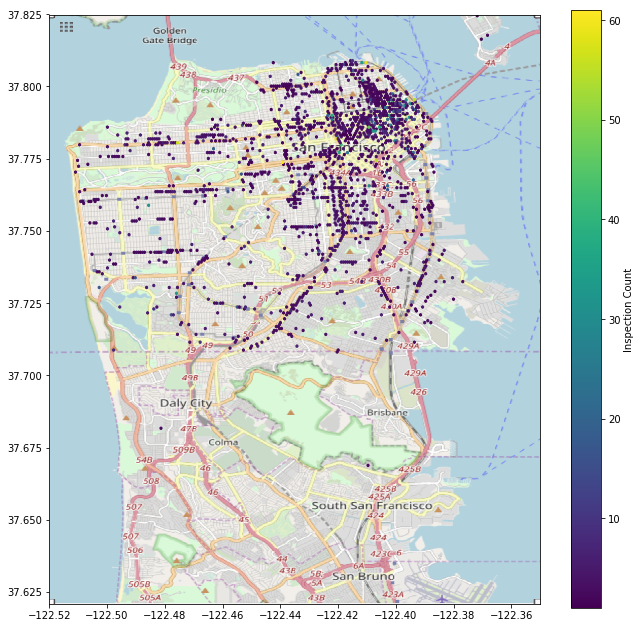

In [39]:
min_lon = rated_geo['longitude'].min()
max_lon = rated_geo['longitude'].max()
min_lat = rated_geo['latitude'].min()
max_lat = rated_geo['latitude'].max()
max_score = rated_geo['score'].max()
min_score = rated_geo['score'].min()
bound = ((min_lon, max_lon, min_lat, max_lat))
min_lon, max_lon, min_lat, max_lat
map_bound = ((-122.5200, -122.3500, 37.6209, 37.8249))

basemap = plt.imread('./data/sf.png')
fig, ax = plt.subplots(figsize = (11,11))
ax.set_xlim(map_bound[0],map_bound[1])
ax.set_ylim(map_bound[2],map_bound[3])

# Create the hexbin plot
grouped=rated_geo.groupby(["longitude","latitude"]).count()
grouped_list=list(zip(*grouped.index))
x_hex=grouped_list[0]
y_hex=grouped_list[1]
c_hex=grouped["score"]
    
plt.hexbin(x_hex,y_hex,gridsize=200,C=c_hex)
plt.colorbar(label='Inspection Count')
ax.imshow(basemap, zorder=0, extent = map_bound, aspect= 'equal');